In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

In [112]:
# Suppress the specific DataConversionWarning
warnings.filterwarnings("ignore")

In [61]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


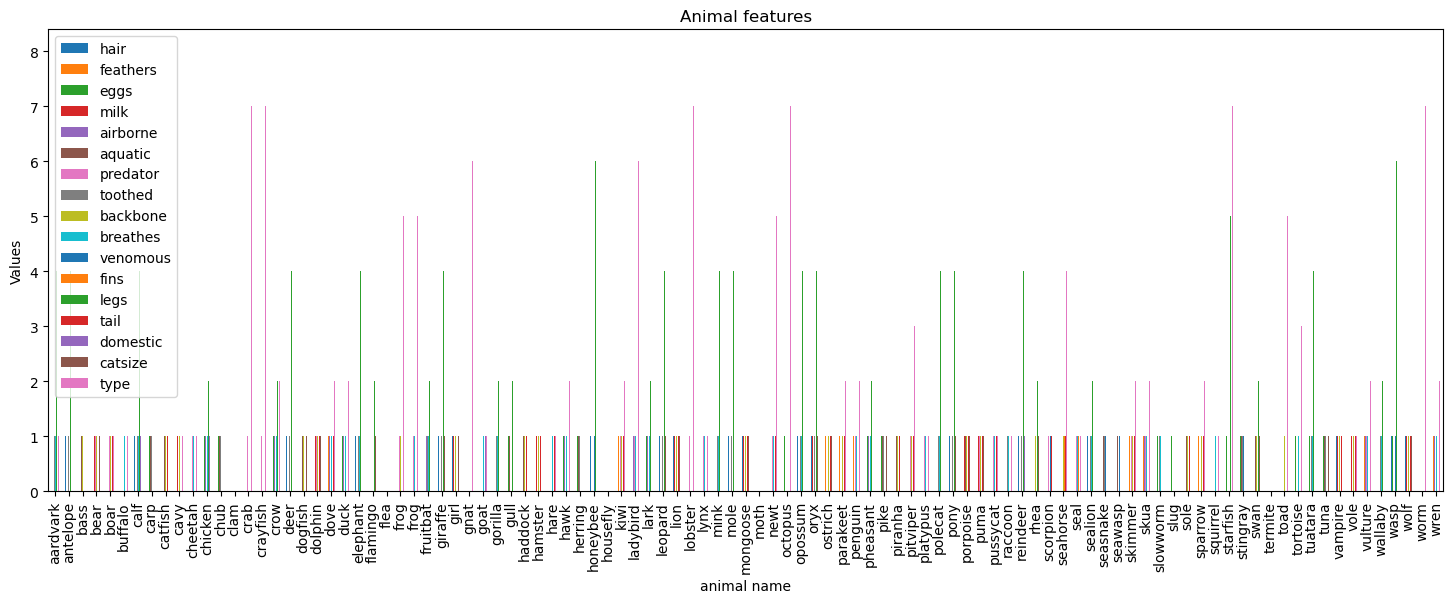

In [62]:
df.set_index('animal name', inplace=True)
df.plot(kind='bar', figsize=(18, 6))
plt.title('Animal features')
plt.ylabel('Values')
plt.show()

In [63]:
# One-Hot Encoding using pd.get_dummies


df.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [66]:
df.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [67]:
df[df.duplicated()]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
giraffe,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


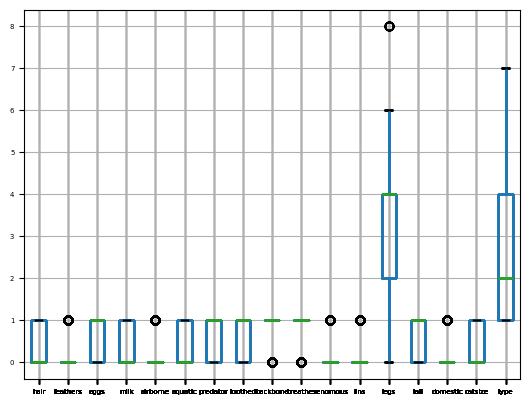

In [68]:
#find numeric column
num_col = [i for i in df.columns if df[i].dtypes!='O']
num_col
#find outliers of numeric column
import matplotlib.pyplot as plt
for i in num_col:
    df.boxplot(column = num_col, fontsize = 5)

plt.show()

In [69]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

hair        1.0
feathers    0.0
eggs        1.0
milk        1.0
airborne    0.0
aquatic     1.0
predator    1.0
toothed     1.0
backbone    0.0
breathes    0.0
venomous    0.0
fins        0.0
legs        2.0
tail        1.0
domestic    0.0
catsize     1.0
type        3.0
dtype: float64

In [70]:
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
df_cleaned = df[~((df < LB) | (df > UB)).any(axis=1)]

In [71]:
df_cleaned

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5


In [72]:
target = df_cleaned[['type']]
target

,type
animal name,
aardvark,1
antelope,1
bear,1
boar,1
buffalo,1
cheetah,1
deer,1
elephant,1
frog,5


In [73]:
feature = df_cleaned.drop('type', axis =1)
feature

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
animal name,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0


In [74]:
# Getting the number of rows and columns
rows, columns = df_cleaned.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 33, Columns: 17


In [76]:
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training Features (X_train):", X_train.shape)
print("Testing Features (X_test):", X_test.shape)
print("Training Target (y_train):", y_train.shape)
print("Testing Target (y_test):", y_test.shape)

Training Features (X_train): (26, 16)
Testing Features (X_test): (7, 16)
Training Target (y_train): (26, 1)
Testing Target (y_test): (7, 1)


In [115]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Check the shape of the data after scaling
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (26, 16)
X_test_scaled shape: (7, 16)


In [97]:
k=3
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
# Train the KNN classifier on the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of KNN Classifier with K={k} and Euclidean Distance: {accuracy * 100:.2f}%')

Accuracy of KNN Classifier with K=3 and Euclidean Distance: 100.00%


In [104]:
# Create a GridSearchCV object
# Define the parameter grid
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(knn, param_grid)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

C:\Users\91980\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=3),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [105]:
# Print the best parameters found by GridSearchCV
print(f'Best Parameters: {grid_search.best_params_}')

# Make predictions with the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Best KNN Classifier: {accuracy * 100:.2f}%')

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Accuracy of Best KNN Classifier: 100.00%


In [108]:
# Evaluate the model's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [120]:
# Create a mesh grid for plotting decision boundaries
#x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
#y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
 #                    np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
#Z = knn.predict(np.c_[xx.ravel(), yy..ravel()])
#Z = Z.reshape(xx.shape)
# Plot the decision boundaries
#plt.figure(figsize=(8, 6))
#plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
#plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
#plt.title(f"KNN Decision Boundaries (k={k})")
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.colorbar()
#plt.show()

KNeighborsClassifier(n_neighbors=3)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not              type
animal name      
platypus        1
leopard         1
aardvark        1
buffalo         1
mole            1
cheetah         1
lion            1
hare            1
raccoon         1
antelope        1
bear            1
tuatara         3
boar            1
toad            5
puma            1
vole            1
polecat         1
newt            5
slowworm        3
deer            1
oryx            1
wolf            1
elephant        1
gorilla         1
lynx            1
tortoise        3